# **ASMR Data Visualisation**

In [1]:
# Importing packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium import Choropleth
import requests
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

## **Retrieving and Processing Data**

### **Deaths Registered in England and Wales - Deaths Data**

In [4]:
# Retrieving deaths data from excel files and saving into pandas dataframes
deaths_18 = pd.read_excel("/content/drive/MyDrive/Data Visualisation Data.xlsx", sheet_name='ASMR 18', skiprows=3)
deaths_df_18 = pd.DataFrame(deaths_18)
deaths_df_18.insert(0, "Year", 2018)
deaths_19 = pd.read_excel("/content/drive/MyDrive/Data Visualisation Data.xlsx", sheet_name='ASMR 19', skiprows=5)
deaths_df_19 = pd.DataFrame(deaths_19)
deaths_df_19.insert(0, "Year", 2019)
deaths_20 = pd.read_excel("/content/drive/MyDrive/Data Visualisation Data.xlsx", sheet_name='ASMR 20', skiprows=7)
deaths_df_20 = pd.DataFrame(deaths_20)
deaths_df_20.insert(0, "Year", 2020)
deaths_21 = pd.read_excel("/content/drive/MyDrive/Data Visualisation Data.xlsx", sheet_name='ASMR 21', skiprows=4)
deaths_df_21 = pd.DataFrame(deaths_21)
deaths_df_21.insert(0, "Year", 2021)
deaths_22 = pd.read_excel("/content/drive/MyDrive/Data Visualisation Data.xlsx", sheet_name='ASMR 22', skiprows=4)
deaths_df_22 = pd.DataFrame(deaths_22)
deaths_df_22.insert(0, "Year", 2022)

In [5]:
# Combining deaths datasets for different years and printng sample
deaths_data = [deaths_df_18, deaths_df_19, deaths_df_20, deaths_df_21, deaths_df_22]
deaths_df = pd.concat(deaths_data)
deaths_df.sample(5, random_state=123)

,Year,Area code,Area of usual residence,Geography level,Persons (Deaths),Males (Deaths),Females (Deaths),Persons (ASMR),Males (ASMR),Females (ASMR),Persons (Lower CL),Persons (Upper CL),Males (Lower CL),Males (Upper CL),Females (Lower CL),Females (Upper CL)
190,2019,E07000076,Tendring,Non-metropolitan District,2212,1069.0,1143.0,1031.1,1164.8,914.9,NaN,NaN,NaN,NaN,NaN,NaN
241,2022,E09000021,Kingston upon Thames,London Borough,1142,559.0,583.0,841.2,978.2,732.2,792.2,890.2,896,1060.4,672.2,792.3
2,2022,E12000001,NORTH EAST,Region,30168,15309.0,14859.0,1093.4,1285.9,942.3,1081,1105.8,1265,1306.8,927.1,957.6
223,2019,E09000014,Haringey,London Borough,1296,686.0,610.0,851.2,1008.5,722.4,NaN,NaN,NaN,NaN,NaN,NaN
119,2021,E07000171,Bassetlaw,Non-metropolitan District,1382,731.0,651.0,1032.4,1255.7,859.5,977.7,1087.2,1162.1,1349.3,793.1,925.9


In [6]:
# Removing rows not associated with region data
deaths_df = deaths_df[deaths_df['Geography level'] == 'Region']
# Removing columns not using
deaths_df = deaths_df.drop(['Area code', 'Geography level', 'Persons (Deaths)', 'Males (Deaths)', 'Females (Deaths)', 'Persons (Lower CL)',
                            'Persons (Upper CL)', 'Males (Lower CL)', 'Males (Upper CL)', 'Females (Lower CL)', 'Females (Upper CL)'], axis=1)
# Renaming area column
deaths_df.rename(columns={'Area of usual residence':'Region'}, inplace = True)
# Changing the capitals format of region column
deaths_df['Region'] = deaths_df['Region'].str.title()
# Changing the yorkshire region name to reflect name in json location data
deaths_df['Region'] = deaths_df['Region'].replace('Yorkshire And The Humber', 'Yorkshire and the Humber')
# Removing trailing space from North West region text
deaths_df['Region'] = deaths_df['Region'].replace('North West ', 'North West')
# Reseting index to reflect edited data
deaths_df = deaths_df.reset_index(drop=True)
# Printing sample of data
deaths_df.sample(5, random_state=123)

,Year,Region,Persons (ASMR),Males (ASMR),Females (ASMR)
8,2018,South West,910.1,1069.4,782
11,2019,Yorkshire and the Humber,998.8,1172,860.7
27,2021,North East,1110.1,1279.8,965.3
30,2021,East Midlands,1023.1,1202.3,876.1
18,2020,North East,1204.3,1399,1044.7


In [7]:
# Checking for missing data and data types
deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            45 non-null     int64 
 1   Region          45 non-null     object
 2   Persons (ASMR)  45 non-null     object
 3   Males (ASMR)    45 non-null     object
 4   Females (ASMR)  45 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.9+ KB


No missing values but not all columns in desired form

In [8]:
# Converting data types of ASMR columns
deaths_df[['Persons (ASMR)', 'Males (ASMR)', 'Females (ASMR)']] = deaths_df[['Persons (ASMR)', 'Males (ASMR)', 'Females (ASMR)']].astype(float)

In [9]:
# Checking data types have been changed correctly
deaths_df.dtypes

,0
Year,int64
Region,object
Persons (ASMR),float64
Males (ASMR),float64
Females (ASMR),float64


In [10]:
# Finding summary statistics of numerical columns
deaths_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,45.0,2020.000000,1.430194,2018.0,2019.0,2020.0,2021.0,2022.0
Persons (ASMR),45.0,989.635556,95.352421,809.1,913.1,994.3,1053.7,1204.3
Males (ASMR),45.0,1159.600000,110.273857,949.9,1072.6,1167.9,1231.2,1399.0
Females (ASMR),45.0,851.057778,84.050849,692.8,780.3,860.7,919.8,1044.7


### **Deaths Registered in England and Wales - Place of Death Data**

In [11]:
# Creating df for place of death data (using 2022 values as most recent)
death_places = pd.read_excel("/content/drive/MyDrive/Data Visualisation Data.xlsx", sheet_name='Death_Places', skiprows=5)
death_places_df = pd.DataFrame(death_places)
death_places_df.head(13)

,Area code,Area of usual residence,Total deaths,Private homes (Number),Local authority care homes (Number),Non-local authority care homes (Number),NHS hospices (Number),Non-NHS hospices (Number),NHS hospitals (Number),Non-NHS hospitals (Number),...,Elsewhere (Number),Private homes (Percentage),Local authority care homes (Percentage),Non-local authority care homes (Percentage),NHS hospices (Percentage),Non-NHS hospices (Percentage),NHS hospitals (Percentage),Non-NHS hospitals (Percentage),Other communal establishments (Percentage),Elsewhere (Percentage)
0,"K04000001, J99000001","England, Wales, and Elsewhere",577160,165232,6526,109590,3178,22888,253724,307,...,13890,28.6,1.1,19,0.6,4,44,0.1,0.3,2.4
1,E92000001,England,540333,154715,6116,104239,3157,22214,235347,241,...,12575,28.6,1.1,19.3,0.6,4.1,43.6,0,0.3,2.3
2,E12000001,North East,30168,8268,99,6442,190,653,13630,0,...,689,27.4,0.3,21.4,0.6,2.2,45.2,0,0.7,2.3
3,E12000002,North West,78626,22167,498,13959,107,3226,36700,36,...,1704,28.2,0.6,17.8,0.1,4.1,46.7,0,0.3,2.2
4,E12000003,Yorkshire and The Humber,57222,16215,628,10563,3,3059,25155,7,...,1435,28.3,1.1,18.5,0,5.3,44,0,0.3,2.5
5,E12000004,East Midlands,49896,14564,662,9932,806,1121,21600,6,...,1053,29.2,1.3,19.9,1.6,2.2,43.3,0,0.3,2.1
6,E12000005,West Midlands,59787,17011,609,10945,159,2625,26940,4,...,1312,28.5,1,18.3,0.3,4.4,45.1,0,0.3,2.2
7,E12000006,East,61837,18076,1253,11812,162,2424,26644,17,...,1319,29.2,2,19.1,0.3,3.9,43.1,0,0.2,2.1
8,E12000007,London,52014,14995,639,6506,118,2284,25460,126,...,1728,28.8,1.2,12.5,0.2,4.4,48.9,0.2,0.3,3.3
9,E12000008,South East,88237,24157,829,20188,1084,4867,34864,32,...,1897,27.4,0.9,22.9,1.2,5.5,39.5,0,0.4,2.1


In [12]:
# Removing rows not associated with region data for persons
indices_to_keep = [2, 3, 4, 5, 6, 7, 8, 9, 10]
death_places_df = death_places_df.loc[indices_to_keep]
# Removing columns not using
death_places_df = death_places_df.drop(['Area code', 'Total deaths', 'Private homes (Number)', 'Local authority care homes (Number)',
                                        'Non-local authority care homes (Number)', 'NHS hospices (Number)', 'Non-NHS hospices (Number)',
                                        'NHS hospitals (Number)', 'Non-NHS hospitals (Number)', 'Other communal establishments (Number)',
                                        'Elsewhere (Number)'], axis=1)
# Renaming area column
death_places_df.rename(columns={'Area of usual residence':'Region'}, inplace = True)
# Reseting index to reflect edited data
death_places_df = death_places_df.reset_index(drop=True)
# Printing data
death_places_df

,Region,Private homes (Percentage),Local authority care homes (Percentage),Non-local authority care homes (Percentage),NHS hospices (Percentage),Non-NHS hospices (Percentage),NHS hospitals (Percentage),Non-NHS hospitals (Percentage),Other communal establishments (Percentage),Elsewhere (Percentage)
0,North East,27.4,0.3,21.4,0.6,2.2,45.2,0,0.7,2.3
1,North West,28.2,0.6,17.8,0.1,4.1,46.7,0,0.3,2.2
2,Yorkshire and The Humber,28.3,1.1,18.5,0,5.3,44,0,0.3,2.5
3,East Midlands,29.2,1.3,19.9,1.6,2.2,43.3,0,0.3,2.1
4,West Midlands,28.5,1,18.3,0.3,4.4,45.1,0,0.3,2.2
5,East,29.2,2,19.1,0.3,3.9,43.1,0,0.2,2.1
6,London,28.8,1.2,12.5,0.2,4.4,48.9,0.2,0.3,3.3
7,South East,27.4,0.9,22.9,1.2,5.5,39.5,0,0.4,2.1
8,South West,30.8,1.4,22.2,0.8,3.1,38.9,0,0.3,2.3


In [13]:
# Checking for missing data and data types
death_places_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 10 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Region                                       9 non-null      object
 1   Private homes (Percentage)                   9 non-null      object
 2   Local authority care homes (Percentage)      9 non-null      object
 3   Non-local authority care homes (Percentage)  9 non-null      object
 4   NHS hospices (Percentage)                    9 non-null      object
 5   Non-NHS hospices (Percentage)                9 non-null      object
 6   NHS hospitals (Percentage)                   9 non-null      object
 7   Non-NHS hospitals (Percentage)               9 non-null      object
 8   Other communal establishments (Percentage)   9 non-null      object
 9   Elsewhere (Percentage)                       9 non-null      object
dtypes: object(10)
memo

No missing values but not all columns in desired form

In [14]:
# Converting datatypes of percentage columns
death_places_df[['Private homes (Percentage)', 'Local authority care homes (Percentage)', 'Non-local authority care homes (Percentage)',
                 'NHS hospices (Percentage)', 'Non-NHS hospices (Percentage)', 'NHS hospitals (Percentage)', 'Non-NHS hospitals (Percentage)',
                 'Other communal establishments (Percentage)', 'Elsewhere (Percentage)']] = death_places_df[['Private homes (Percentage)',
                 'Local authority care homes (Percentage)', 'Non-local authority care homes (Percentage)', 'NHS hospices (Percentage)',
                 'Non-NHS hospices (Percentage)', 'NHS hospitals (Percentage)', 'Non-NHS hospitals (Percentage)',
                 'Other communal establishments (Percentage)', 'Elsewhere (Percentage)']].astype(float)

In [15]:
# Checking data types have been changed
death_places_df.dtypes

,0
Region,object
Private homes (Percentage),float64
Local authority care homes (Percentage),float64
Non-local authority care homes (Percentage),float64
NHS hospices (Percentage),float64
Non-NHS hospices (Percentage),float64
NHS hospitals (Percentage),float64
Non-NHS hospitals (Percentage),float64
Other communal establishments (Percentage),float64
Elsewhere (Percentage),float64


In [16]:
# Finding summary statistics of numerical columns
death_places_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Private homes (Percentage),9.0,28.644444,1.044164,27.4,28.2,28.5,29.2,30.8
Local authority care homes (Percentage),9.0,1.088889,0.485913,0.3,0.9,1.1,1.3,2.0
Non-local authority care homes (Percentage),9.0,19.177778,3.085765,12.5,18.3,19.1,21.4,22.9
NHS hospices (Percentage),9.0,0.566667,0.540833,0.0,0.2,0.3,0.8,1.6
Non-NHS hospices (Percentage),9.0,3.900000,1.197915,2.2,3.1,4.1,4.4,5.5
NHS hospitals (Percentage),9.0,43.855556,3.188303,38.9,43.1,44.0,45.2,48.9
Non-NHS hospitals (Percentage),9.0,0.022222,0.066667,0.0,0.0,0.0,0.0,0.2
Other communal establishments (Percentage),9.0,0.344444,0.142400,0.2,0.3,0.3,0.3,0.7
Elsewhere (Percentage),9.0,2.344444,0.381153,2.1,2.1,2.2,2.3,3.3


### **Health Index Scores, England - Overall Scores Data**

In [17]:
# Creating df for overall health index score data
health_overall = pd.read_excel("/content/drive/MyDrive/Data Visualisation Data.xlsx", sheet_name='Overall_Index_scores', skiprows=2)
health_overall_df = pd.DataFrame(health_overall)
health_overall_df.head()

,Area Code,Area Name,Area Type [Note 3],2015,2016,2017,2018,2019,2020,2021
0,E92000001,ENGLAND,Country,100.0,100.5,100.9,100.9,100.9,100.1,100.8
1,E12000001,North East,Region,94.3,95.1,94.6,93.9,93.8,93.4,93.8
2,E06000001,Hartlepool,LTLA,88.3,88.5,86.3,85.6,85.4,87.3,87.2
3,E06000002,Middlesbrough,LTLA,83.3,82.5,82.7,80.9,79.7,79.1,80.2
4,E06000003,Redcar and Cleveland,LTLA,96.6,98.0,97.9,96.2,95.7,92.1,92.5


In [18]:
# Removing rows not associated with region data
health_overall_df = health_overall_df[health_overall_df['Area Type [Note 3]'] == 'Region']
# Removing columns not using (only analysing with 2019 as year before covid)
health_overall_df = health_overall_df.drop(['Area Code', 'Area Type [Note 3]', '2015', '2016', '2017', '2018', '2020', '2021'], axis=1)
# Renaming area column
health_overall_df.rename(columns={'Area Name':'Region'}, inplace = True)
# Changing the region names so same as in other dfs
health_overall_df['Region'] = health_overall_df['Region'].replace('Yorkshire and The Humber', 'Yorkshire and the Humber')
health_overall_df['Region'] = health_overall_df['Region'].replace('East of England', 'East')
# Reseting index to reflect edited data
health_overall_df = health_overall_df.reset_index(drop=True)
# Printing sample of data
health_overall_df

,Region,2019
0,North East,93.8
1,North West,97.2
2,Yorkshire and the Humber,96.1
3,East Midlands,101.8
4,West Midlands,96.7
5,East,104.6
6,London,100.1
7,South East,106.2
8,South West,106.3


In [19]:
# Checking for missing data and data types
health_overall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Region  9 non-null      object 
 1   2019    9 non-null      float64
dtypes: float64(1), object(1)
memory usage: 276.0+ bytes


No missing values and all columns in desired form

In [20]:
# Finding summary statistics of numerical columns
health_overall_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
2019,9.0,100.311111,4.664345,93.8,96.7,100.1,104.6,106.3


### **Health Index Scores, England - 2019 Data**

In [21]:
# Creating df for 2019 health index data
health_index = pd.read_excel("/content/drive/MyDrive/Data Visualisation Data.xlsx", sheet_name='2019_Index', skiprows=4)
health_index_df = pd.DataFrame(health_index)
health_index_df.head()

,Area Code,Area Name,Area Type [Note 3],Healthy People Domain,Difficulties in daily life [Pe],Disability [Pe1],Frailty [Pe1],Mental health [Pe],"Children's social, emotional and mental health [Pe2]",Mental health conditions [Pe2],...,Child poverty [Pl4],Job-related training [Pl4],Unemployment [Pl4],Workplace safety [Pl4],Living conditions [Pl],Air pollution [Pl5],Household overcrowding [Pl5],Noise complaints [Pl5],Road safety [Pl5],Rough sleeping [Pl5]
0,E92000001,ENGLAND,Country,99.6,98.2,94.7,102.3,98.5,95.6,97.8,...,101.0,98.6,107.9,103.9,102.2,98.9,107.2,100.9,101.1,98.1
1,E12000001,North East,Region,86.0,85.5,83.1,93.2,88.4,90.4,93.2,...,92.7,98.2,94.8,102.7,113.7,122.0,118.4,101.4,105.3,107.8
2,E06000001,Hartlepool,LTLA,83.1,74.1,69.1,88.5,95.2,99.3,95.0,...,90.6,107.6,89.2,93.5,112.3,117.5,119.5,101.1,104.8,104.6
3,E06000002,Middlesbrough,LTLA,77.9,74.7,84.6,74.1,78.6,90.2,92.0,...,79.3,94.8,89.1,115.6,100.9,110.7,103.1,96.5,97.0,96.4
4,E06000003,Redcar and Cleveland,LTLA,89.6,87.6,73.5,106.2,85.0,88.3,95.8,...,93.5,98.6,95.1,91.7,117.5,114.1,122.5,102.7,110.1,123.2


In [22]:
# Removing rows not associated with region data
health_index_df = health_index_df[health_index_df['Area Type [Note 3]'] == 'Region']
# Removing columns not using
health_index_df = health_index_df.drop(['Area Code', 'Area Type [Note 3]'], axis=1)
# Renaming area column
health_index_df.rename(columns={'Area Name':'Region'}, inplace = True)
# Changing the region names so same as in other dfs
health_index_df['Region'] = health_index_df['Region'].replace('Yorkshire and The Humber', 'Yorkshire and the Humber')
health_index_df['Region'] = health_index_df['Region'].replace('East of England', 'East')
# Reseting index to reflect edited data
health_index_df = health_index_df.reset_index(drop=True)
# Printing sample of data
health_index_df

,Region,Healthy People Domain,Difficulties in daily life [Pe],Disability [Pe1],Frailty [Pe1],Mental health [Pe],"Children's social, emotional and mental health [Pe2]",Mental health conditions [Pe2],Self-harm [Pe2],Suicides [Pe2],...,Child poverty [Pl4],Job-related training [Pl4],Unemployment [Pl4],Workplace safety [Pl4],Living conditions [Pl],Air pollution [Pl5],Household overcrowding [Pl5],Noise complaints [Pl5],Road safety [Pl5],Rough sleeping [Pl5]
0,North East,86.0,85.5,83.1,93.2,88.4,90.4,93.2,89.9,94.0,...,92.7,98.2,94.8,102.7,113.7,122.0,118.4,101.4,105.3,107.8
1,North West,93.4,91.7,90.6,95.8,94.5,95.2,97.1,94.5,97.9,...,93.9,93.4,105.6,102.0,107.4,108.4,110.9,106.1,101.6,101.8
2,Yorkshire and the Humber,93.8,93.2,87.2,101.7,93.4,96.0,92.9,99.3,92.2,...,93.0,100.5,102.7,102.9,105.2,104.4,110.4,98.8,104.1,100.4
3,East Midlands,97.1,90.7,90.9,93.8,99.0,98.5,95.3,99.9,102.9,...,103.6,106.0,108.7,99.9,106.9,96.1,116.6,103.5,105.8,100.1
4,West Midlands,96.2,94.6,93.8,97.4,98.9,98.9,97.7,100.3,99.6,...,96.1,95.1,103.0,102.4,102.3,96.4,107.0,102.7,101.4,99.1
5,East,102.5,99.8,96.4,103.3,100.0,97.1,98.4,103.4,99.5,...,107.0,96.3,114.6,103.7,104.3,93.6,109.9,104.3,106.0,98.4
6,London,112.0,112.9,105.9,115.3,112.2,96.1,105.7,117.1,109.1,...,101.9,96.2,100.7,105.0,83.7,80.8,89.0,86.6,85.9,93.9
7,South East,102.2,101.2,97.4,104.6,97.6,95.9,97.1,97.5,102.2,...,106.9,99.3,117.5,108.6,102.4,98.1,106.5,103.0,103.0,94.8
8,South West,98.5,97.4,92.9,102.9,90.4,89.3,96.2,91.5,95.4,...,107.5,106.6,115.3,104.4,110.0,111.7,113.5,107.0,107.3,95.5


In [23]:
# Checking for missing data and data types
health_index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 74 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Region                                                          9 non-null      object 
 1   Healthy People Domain                                           9 non-null      float64
 2   Difficulties in daily life [Pe]                                 9 non-null      float64
 3   Disability [Pe1]                                                9 non-null      float64
 4   Frailty [Pe1]                                                   9 non-null      float64
 5   Mental health [Pe]                                              9 non-null      float64
 6   Children's social, emotional and mental health [Pe2]            9 non-null      float64
 7   Mental health conditions [Pe2]                           

No missing values and all columns in desired form

In [24]:
# Finding summary statistics of numerical columns
health_index_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Healthy People Domain,9.0,97.966667,7.254137,86.0,93.8,97.1,102.2,112.0
Difficulties in daily life [Pe],9.0,96.333333,7.863523,85.5,91.7,94.6,99.8,112.9
Disability [Pe1],9.0,93.133333,6.515750,83.1,90.6,92.9,96.4,105.9
Frailty [Pe1],9.0,100.888889,6.886662,93.2,95.8,101.7,103.3,115.3
Mental health [Pe],9.0,97.155556,6.932913,88.4,93.4,97.6,99.0,112.2
...,...,...,...,...,...,...,...,...
Air pollution [Pl5],9.0,101.277778,11.924217,80.8,96.1,98.1,108.4,122.0
Household overcrowding [Pl5],9.0,109.133333,8.535514,89.0,107.0,110.4,113.5,118.4
Noise complaints [Pl5],9.0,101.488889,6.085319,86.6,101.4,103.0,104.3,107.0
Road safety [Pl5],9.0,102.266667,6.460650,85.9,101.6,104.1,105.8,107.3


In [25]:
# Combining health index data with overall health index scores data
health_index_df = pd.merge(health_index_df, health_overall_df, on='Region')
health_index_df.rename(columns={'2019':'Overall'}, inplace = True)
health_index_df.head()

,Region,Healthy People Domain,Difficulties in daily life [Pe],Disability [Pe1],Frailty [Pe1],Mental health [Pe],"Children's social, emotional and mental health [Pe2]",Mental health conditions [Pe2],Self-harm [Pe2],Suicides [Pe2],...,Job-related training [Pl4],Unemployment [Pl4],Workplace safety [Pl4],Living conditions [Pl],Air pollution [Pl5],Household overcrowding [Pl5],Noise complaints [Pl5],Road safety [Pl5],Rough sleeping [Pl5],Overall
0,North East,86.0,85.5,83.1,93.2,88.4,90.4,93.2,89.9,94.0,...,98.2,94.8,102.7,113.7,122.0,118.4,101.4,105.3,107.8,93.8
1,North West,93.4,91.7,90.6,95.8,94.5,95.2,97.1,94.5,97.9,...,93.4,105.6,102.0,107.4,108.4,110.9,106.1,101.6,101.8,97.2
2,Yorkshire and the Humber,93.8,93.2,87.2,101.7,93.4,96.0,92.9,99.3,92.2,...,100.5,102.7,102.9,105.2,104.4,110.4,98.8,104.1,100.4,96.1
3,East Midlands,97.1,90.7,90.9,93.8,99.0,98.5,95.3,99.9,102.9,...,106.0,108.7,99.9,106.9,96.1,116.6,103.5,105.8,100.1,101.8
4,West Midlands,96.2,94.6,93.8,97.4,98.9,98.9,97.7,100.3,99.6,...,95.1,103.0,102.4,102.3,96.4,107.0,102.7,101.4,99.1,96.7


## **ASMR Data Analysis**

In [26]:
# Creating df for ASMR totals
deaths_df_sums = pd.DataFrame({
    'Category': ['Persons (ASMR)', 'Males (ASMR)', 'Females (ASMR)'],
    'Total': [deaths_df['Persons (ASMR)'].sum(), deaths_df['Males (ASMR)'].sum(), deaths_df['Females (ASMR)'].sum()]
})
deaths_df_sums

,Category,Total
0,Persons (ASMR),44533.6
1,Males (ASMR),52182.0
2,Females (ASMR),38297.6


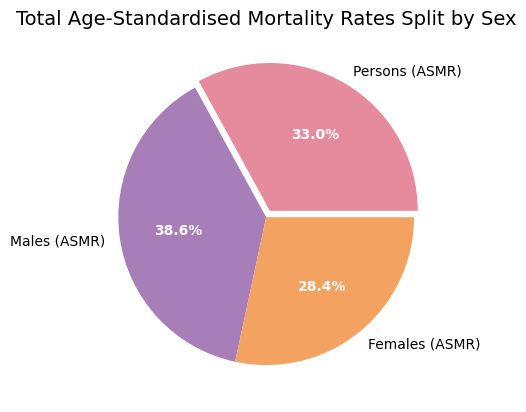

In [27]:
# Creating pie chart to show the split of ASMR by sex
colours = ['#e68a9e', '#a77eb7', '#f4a261']
patches, texts, pcts = plt.pie(deaths_df_sums['Total'], labels=deaths_df_sums['Category'], colors=colours, autopct='%1.1f%%', wedgeprops={'linewidth': 0.0, 'edgecolor': 'white'}, explode=(0.05,0,0))
plt.setp(pcts, color='white', fontweight='bold')
plt.title("Total Age-Standardised Mortality Rates Split by Sex", fontsize=14)
plt.show()

Overall males have higher rate than females. Therefore, overall is between the two.

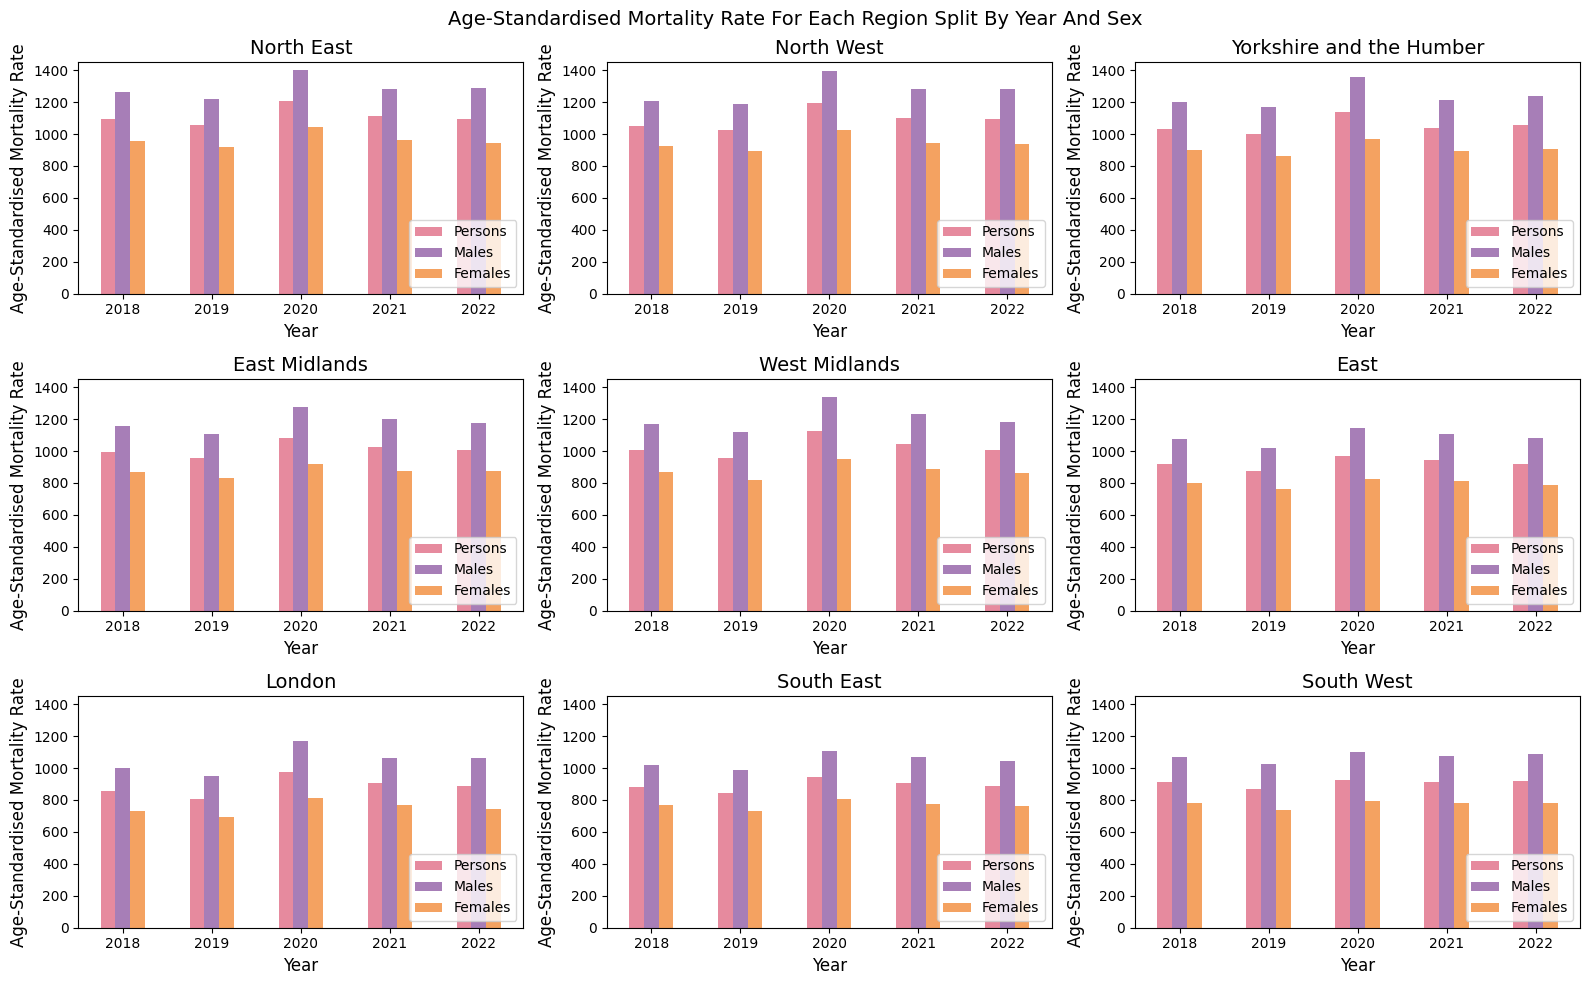

In [28]:
# Creating bar charts to show split of sex by region and year
regions = deaths_df['Region'].unique()

# Creating axes for graphs
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))
axes = axes.flatten()

fig.suptitle('Age-Standardised Mortality Rate For Each Region Split By Year And Sex', fontsize=14)

colours = ['#e68a9e', '#a77eb7', '#f4a261']

# Adding bar plot to axes for each region in the dataset
for i, region in enumerate(regions):
  region_df = deaths_df[deaths_df['Region'] == region]
  region_df.plot(x='Year', y=['Persons (ASMR)', 'Males (ASMR)', 'Females (ASMR)'], legend=True, kind='bar', ax=axes[i], color=colours)
  # Customising plots
  axes[i].set_title(region, fontsize=14)
  axes[i].set_ylabel('Age-Standardised Mortality Rate', fontsize=12)
  axes[i].set_xlabel('Year', fontsize=12)
  axes[i].legend(['Persons', 'Males', 'Females'], loc='lower right')
  axes[i].tick_params(axis='x', rotation=0)
  axes[i].set_ylim(0, deaths_df[['Persons (ASMR)', 'Males (ASMR)', 'Females (ASMR)']].max().max()+50)

plt.tight_layout()
plt.show()

Can see there is still the same trend between persons, male and female within each year in each location. As persons is roughly the middle and represents all, this can be used to look for other insights.

In [29]:
# Creating df for year totals
deaths_df_yg = deaths_df.drop(columns=['Region'])
deaths_df_yg = deaths_df_yg.groupby("Year").sum().reset_index()
deaths_df_yg.columns = ['Year', 'Total Persons (ASMR)', 'Total Males (ASMR)', 'Total Females (ASMR)']
deaths_df_yg

,Year,Total Persons (ASMR),Total Males (ASMR),Total Females (ASMR)
0,2018,8744.1,10157.4,7593.7
1,2019,8387.0,9790.8,7247.0
2,2020,9550.4,11281.6,8144.9
3,2021,8984.4,10513.8,7707.3
4,2022,8867.7,10438.4,7604.7


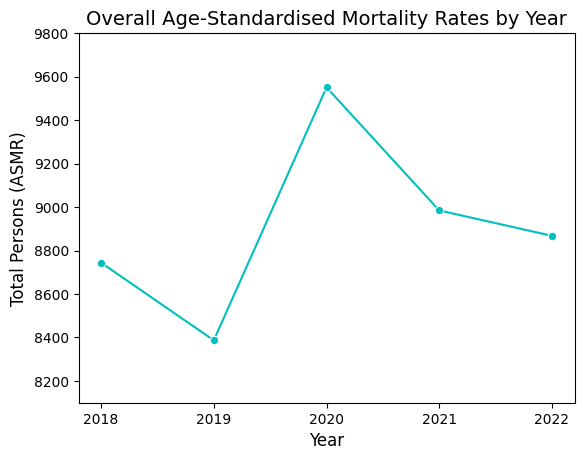

In [30]:
# Plotting line graph showing trend over years for total persons ASMR
sns.lineplot(data=deaths_df_yg, x='Year', y='Total Persons (ASMR)', color='colorblind'[0], marker='o')
# Customising plot
plt.title("Overall Age-Standardised Mortality Rates by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Persons (ASMR)", fontsize=12)
plt.xticks(deaths_df_yg['Year'])
plt.ylim(8100, 9800)
plt.show()

Peak in 2020 (due to covid) and still higher for 2 years after than before.

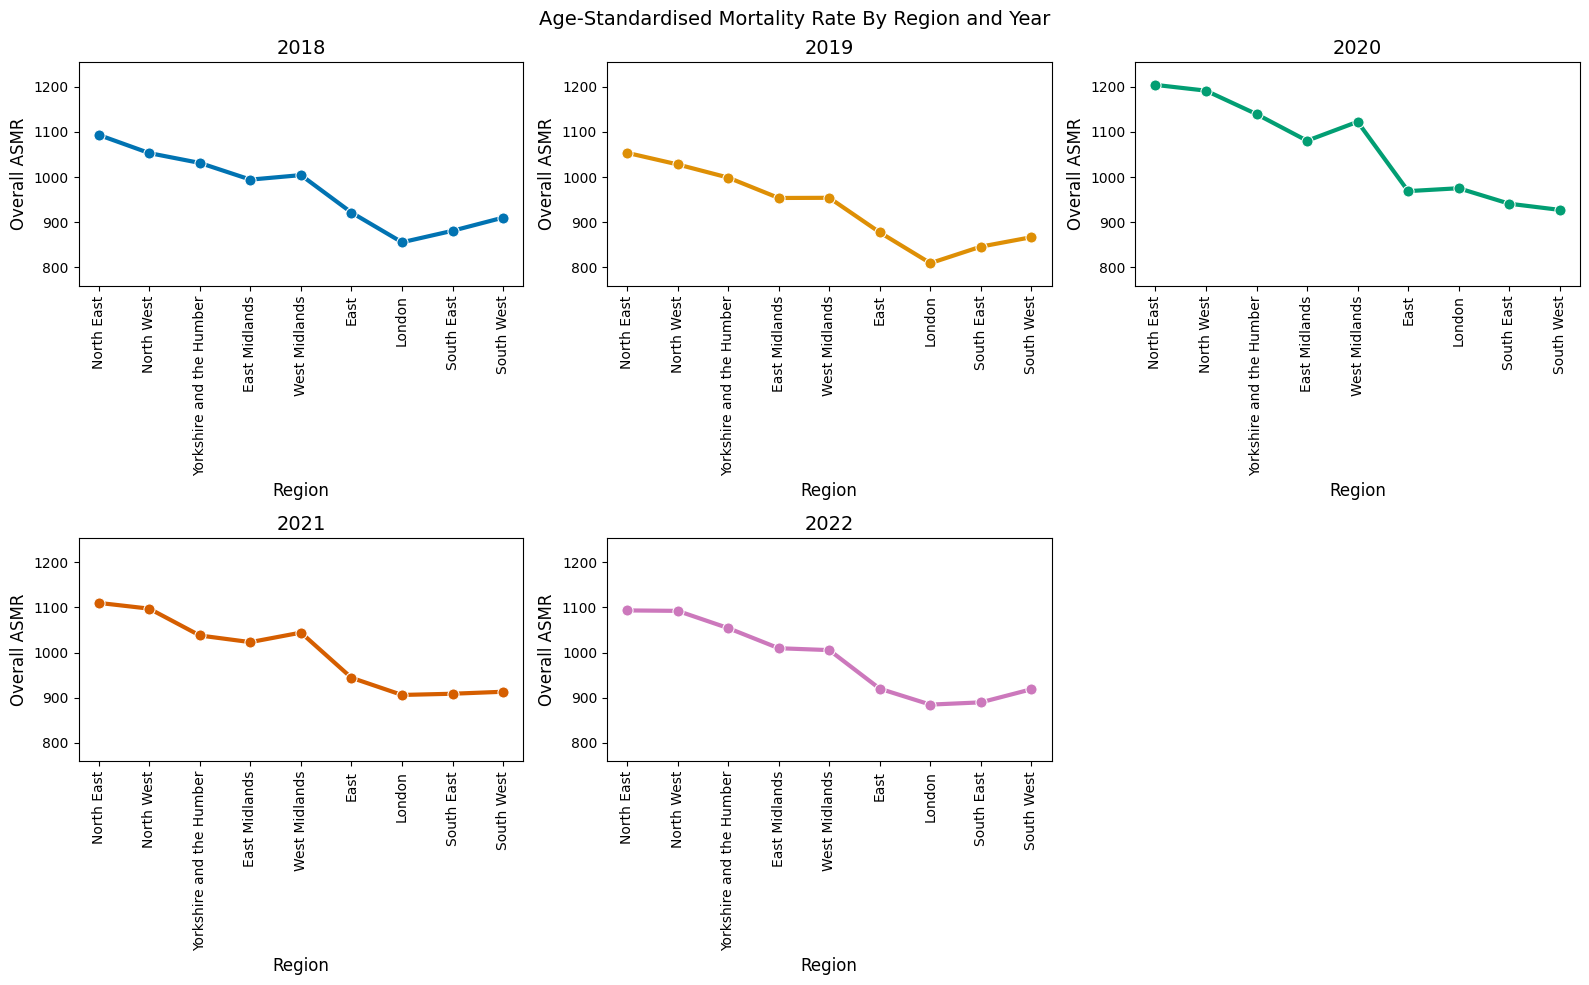

In [31]:
# Creating line graphs to show ASMR by region for each year
years = deaths_df['Year'].unique()

# Creating axes for graphs
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
axes = axes.flatten()

fig.suptitle('Age-Standardised Mortality Rate By Region and Year', fontsize=14)

colours = sns.color_palette('colorblind', n_colors=5)

# Adding a line plot for each year
for i, year in enumerate(years):
  year_df = deaths_df[deaths_df['Year'] == year]
  sns.lineplot(data=year_df, x='Region', y='Persons (ASMR)', ax=axes[i], color=colours[i], marker='o', markersize=8, linewidth=3)
  # Customising plots
  axes[i].set_title(year, fontsize=14)
  axes[i].set_ylabel('Overall ASMR', fontsize=12)
  axes[i].set_xlabel('Region', fontsize=12)
  axes[i].tick_params(axis='x', rotation=90)
  axes[i].set_ylim(deaths_df['Persons (ASMR)'].min()-50, deaths_df['Persons (ASMR)'].max()+50)

# Deleting any empty axis
for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

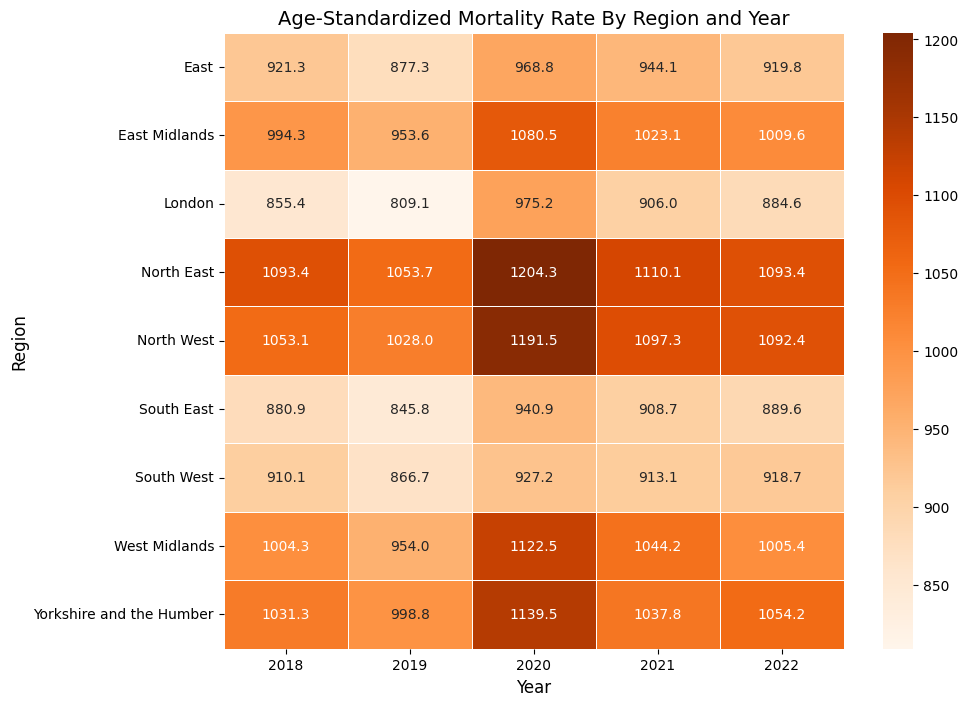

In [32]:
# Creating heatmap to show ASMR for region by each year
# Putting data into desired format
deaths_heatmap_data = deaths_df.pivot_table(index='Region', columns='Year', values='Persons (ASMR)')

# Creating heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(deaths_heatmap_data, cmap='Oranges', annot=True, fmt=".1f", linewidths=0.5)
# Customising heatmap
plt.title('Age-Standardized Mortality Rate By Region and Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.xticks(rotation=0)
plt.show()


For each year, the regions tend to follow the same pattern. While 2020 is skewed higher, trends remain the same.

In [33]:
# Printing regions with highest and lowest ASMR for each year
print("Regions with highest and lowest mortality rates by year -")

for year, group in deaths_df.groupby("Year"):
    highest = group.nlargest(2, 'Persons (ASMR)'),
    lowest = group.nsmallest(2, 'Persons (ASMR)')

    print("Year: ", year),
    print("Highest Regions: ", ', '.join(group['Region'][highest[0].index].values)),
    print("Lowest Regions: ", ', '.join(group['Region'][lowest.index].values))

Regions with highest and lowest mortality rates by year -
Year:  2018
Highest Regions:  North East, North West
Lowest Regions:  London, South East
Year:  2019
Highest Regions:  North East, North West
Lowest Regions:  London, South East
Year:  2020
Highest Regions:  North East, North West
Lowest Regions:  South West, South East
Year:  2021
Highest Regions:  North East, North West
Lowest Regions:  London, South East
Year:  2022
Highest Regions:  North East, North West
Lowest Regions:  London, South East


Regions with highest ASMR are North and lowest are South. As this trend is replicated for each year, we can combine to give overall regional picture.

In [34]:
# Finding the average for each region and adding to df
deaths_df_rg = deaths_df.groupby("Region")['Persons (ASMR)'].mean().reset_index()
deaths_df_rg.columns = ['Region', 'Persons (ASMR) Average']
deaths_df_rg

,Region,Persons (ASMR) Average
0,East,926.26
1,East Midlands,1012.22
2,London,886.06
3,North East,1110.98
4,North West,1092.46
5,South East,893.18
6,South West,907.16
7,West Midlands,1026.08
8,Yorkshire and the Humber,1052.32


In [35]:
# Creating location map to show which regions perform best and worse
m = folium.Map(location=[55, -3], zoom_start=6) # Zoomed to show UK

# Connecting to location data
geo_data_url = 'https://raw.githubusercontent.com/fedderw/uk-ubi-regional-maps/main/uk_regions.geojson'
geo_json_data = requests.get(geo_data_url).json()

# Creating and customising map
cp = folium.Choropleth(
    geo_data=geo_data_url,
    data=deaths_df_rg,
    columns=['Region', 'Persons (ASMR) Average'],
    key_on='feature.properties.rgn19nm',
    fill_color='YlOrRd', # Used yellow to red colour scheme as green to red has potential issue with colourblind people
    fill_opacity=0.7,
    line_opacity=0.2,
    highlight=True,
    nan_fill_color="white",
    legend_name='Persons (ASMR)').add_to(m)

# Adding hover text to map
folium.GeoJsonTooltip(
    fields=['rgn19nm'],
    aliases=['Region']).add_to(cp.geojson)

# Printing map and title
print("Age-Standardised Mortality Rate by English Regions (2018-2022 Average)")
m

Age-Standardised Mortality Rate by English Regions (2018-2022 Average)


Clear from map that ASMRs are lower in the South and increase as moving further North.

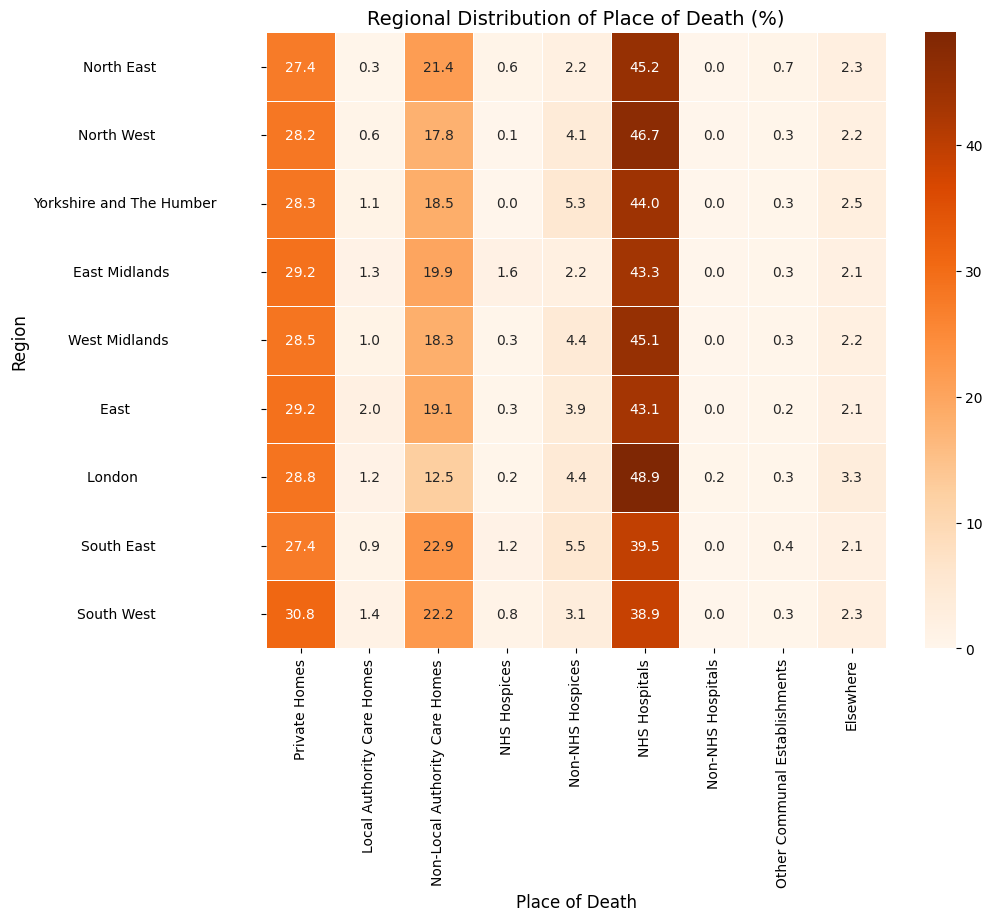

In [36]:
# Creating heatmap to show the regional differences in place of death
places_heatmap_data = death_places_df.set_index('Region')

plt.figure(figsize=(10, 8))
sns.heatmap(places_heatmap_data, cmap='Oranges', annot=True, fmt=".1f", linewidths=0.5)
# Customising heatmap
plt.title('Regional Distribution of Place of Death (%)', fontsize=14)
plt.xlabel('Place of Death', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.xticks(ticks=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5], labels=['Private Homes', 'Local Authority Care Homes', 'Non-Local Authority Care Homes', 'NHS Hospices',
                                              'Non-NHS Hospices', 'NHS Hospitals', 'Non-NHS Hospitals', 'Other Communal Establishments', 'Elsewhere'], rotation=90)
plt.show()

Same pattern in each region. Therefore, can't deduce that regional differences in asmr are due to differing quality of care in care homes or hospitals in regions.

## **Health Index Data Analysis**

In [37]:
# Creating df for deaths data for just 2019 (using for analysis as last year before covid)
deaths_df19 = deaths_df[deaths_df['Year'] == 2019].reset_index(drop=True)
deaths_df19

,Year,Region,Persons (ASMR),Males (ASMR),Females (ASMR)
0,2019,North East,1053.7,1220.9,919.8
1,2019,North West,1028.0,1190.5,893.1
2,2019,Yorkshire and the Humber,998.8,1172.0,860.7
3,2019,East Midlands,953.6,1105.7,831.4
4,2019,West Midlands,954.0,1119.4,818.5
5,2019,East,877.3,1018.9,761.9
6,2019,London,809.1,949.9,692.8
7,2019,South East,845.8,988.5,730.0
8,2019,South West,866.7,1025.0,738.8


In [38]:
# Creating location map to show overall health scores by index
m = folium.Map(location=[55, -3], zoom_start=6)

# Connecting to location data
geo_data_url = 'https://raw.githubusercontent.com/fedderw/uk-ubi-regional-maps/main/uk_regions.geojson'
geo_json_data = requests.get(geo_data_url).json()

# Creating and customising map
cp = folium.Choropleth(
    geo_data=geo_data_url,
    data=health_index_df,
    columns=['Region', 'Overall'],
    key_on='feature.properties.rgn19nm',
    fill_color='YlOrRd_r',
    fill_opacity=0.7,
    line_opacity=0.2,
    highlight=True,
    nan_fill_color="white",
    legend_name='Overall Health Index').add_to(m)

# Adding hover text to map
folium.GeoJsonTooltip(
    fields=['rgn19nm'],
    aliases=['Region']).add_to(cp.geojson)

# Printing map and title
print("Health Index by English Regions (2019)")
m

Health Index by English Regions (2019)




*   100 is average (based off England 2015 values)
*   Lower than 100 is below average
*   Higher than 100 is above average



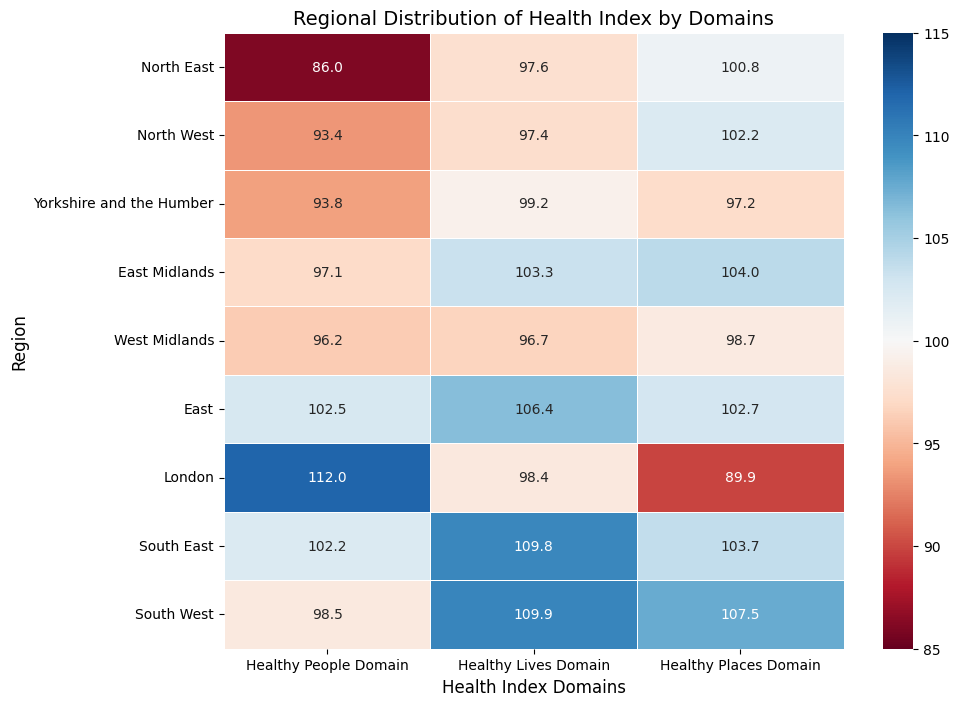

In [39]:
# Creating heatmap to show health index scores for 3 domains each region
# Putting data into desired format
health_heatmap_data = health_index_df[['Region', 'Healthy People Domain', 'Healthy Lives Domain', 'Healthy Places Domain']]
health_heatmap_data = health_heatmap_data.set_index('Region')

# Creating and customising heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(health_heatmap_data, cmap='RdBu', annot=True, fmt=".1f", linewidths=0.5, center=100, vmin=85, vmax=115)
plt.title('Regional Distribution of Health Index by Domains', fontsize=14)
plt.xlabel('Health Index Domains', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.show()

*   Healthy people domain most closely reflects the ASMR distribution between regions.
*   Healthy lives domain roughly follows the distribution, but the lower values are less significantly lower.
*   Healthy places domain doesn't follow the same distribution. With most regions performing well except London which performs poorly.

In [40]:
# Finding correlation between 2019 persons ASMR and different health index scores
corr_dict = {}
for i in health_index_df.columns[1:]:
  r = np.corrcoef(deaths_df19['Persons (ASMR)'], health_index_df[i])[0,1]
  corr_dict[i] = r

# Adding column names and correlation values to df
corr_df = pd.DataFrame(corr_dict.items(), columns=['Column', 'Correlation'])
corr_df = corr_df.sort_values(by='Correlation', ascending=True)
corr_df

,Column,Correlation
13,Mortality from all causes [Pe3],-0.999142
12,Life expectancy [Pe3],-0.995539
36,Children and young people [L],-0.982307
9,Mortality [Pe],-0.981422
10,Avoidable mortality [Pe3],-0.955053
...,...,...
67,Living conditions [Pl],0.660842
68,Air pollution [Pl5],0.697484
51,Access to green space [Pl],0.730912
52,Private outdoor space [Pl1],0.730912


**Creating line graphs for each of the subdomains within the health index**

There is a strong correlation if subdomain is low while ASMR is high and vice versa.

* Positive values for ASMR are low (as want lower death rates)
* Positive values for health index are high (as over 100 is above average)
* Therefore, there is a strong correlation between the health index and ASMR if the correlation is negative




In [41]:
# Printing columns with correlation value suggesting significant negative correlation between health index and ASMR
corr_df[corr_df['Correlation'] < -0.75]

,Column,Correlation
13,Mortality from all causes [Pe3],-0.999142
12,Life expectancy [Pe3],-0.995539
36,Children and young people [L],-0.982307
9,Mortality [Pe],-0.981422
10,Avoidable mortality [Pe3],-0.955053
40,Teenage pregnancy [L2],-0.955048
0,Healthy People Domain,-0.921816
39,Pupil attainment [L2],-0.916619
1,Difficulties in daily life [Pe],-0.895473
2,Disability [Pe1],-0.890580


In [42]:
# Creating dual axis line graph for difficulties in daily life subdomain and persons ASMR
sorted_df = deaths_df19.sort_values(by='Persons (ASMR)')
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Adding difficulties in daily life data
fig.add_trace(
    go.Scatter(x=sorted_df['Region'], y=health_index_df.loc[sorted_df.index, 'Difficulties in daily life [Pe]'],
               name='Health Index for Daily Life Difficulties', mode='lines+markers', marker=dict(color="#3A0CA3", size=8),
               line=dict(color="#3A0CA3", width=3)),
    secondary_y=False)

# Adding persons ASMR data
fig.add_trace(
    go.Scatter(x=sorted_df['Region'], y=sorted_df['Persons (ASMR)'], name='Persons ASMR', mode='lines+markers',
               marker=dict(color="#F72585", size=8), line=dict(color="#F72585", width=3)),
    secondary_y=True)

# Customising line graph
fig.update_layout(title_text='Comparison Between Difficulties in Daily Life and Age-Standardised Mortality Rates', hovermode="x unified")
fig.update_xaxes(title_text='Regions in England')
fig.update_yaxes(title_text='Difficulties in Daily Life (Health Index)', secondary_y=False)
fig.update_yaxes(title_text='Age-Standardised Mortality Rate (Persons)', secondary_y=True)

* Graph suggests there is a negative correlation between daily life difficulties and persons ASMR.
* The East and East Midlands don't fit with trend as well as the other regions.

In [43]:
# Creating dual axis line graph for behavioural risk factors subdomain and persons ASMR
sorted_df = deaths_df19.sort_values(by='Persons (ASMR)')
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Adding behavioural risk factors data
fig.add_trace(
    go.Scatter(x=sorted_df['Region'], y=health_index_df.loc[sorted_df.index, 'Behavioural risk factors [L]'], name='Health Index for Behavioural Risk Factors',
               mode='lines+markers', marker=dict(color="#3A0CA3", size=8), line=dict(color="#3A0CA3", width=3)),
    secondary_y=False)

# Adding persons ASMR data
fig.add_trace(
    go.Scatter(x=sorted_df['Region'], y=sorted_df['Persons (ASMR)'], name='Persons ASMR', mode='lines+markers', marker=dict(color="#F72585", size=8),
               line=dict(color="#F72585", width=3)),
    secondary_y=True)

# Customising line graph
fig.update_layout(title_text='Comparison Between Behavioural Risk Factors and Age-Standardised Mortality Rates', hovermode="x unified")
fig.update_xaxes(title_text='Regions in England')
fig.update_yaxes(title_text='Behavioural Risk Factors (Health Index)', secondary_y=False)
fig.update_yaxes(title_text='Age-Standardised Mortality Rate (Persons)', secondary_y=True)

* Graph suggests there is a negative correlation between daily life difficulties and persons ASMR.
* However, London doesn't fit with this trend.
* The West Midlands is also lower than expected from trend.

In [44]:
# Creating dual axis line graph for children and young people subdomain and persons ASMR
sorted_df = deaths_df19.sort_values(by='Persons (ASMR)')
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Adding children and young people data
fig.add_trace(
    go.Scatter(x=sorted_df['Region'], y=health_index_df.loc[sorted_df.index, 'Children and young people [L]'], name='Health Index for Children and Young People',
               mode='lines+markers', marker=dict(color="#3A0CA3", size=8), line=dict(color="#3A0CA3", width=3)),
    secondary_y=False)

# Adding persons ASMR data
fig.add_trace(
    go.Scatter(x=sorted_df['Region'], y=sorted_df['Persons (ASMR)'], name='Persons ASMR', mode='lines+markers', marker=dict(color="#F72585", size=8),
               line=dict(color="#F72585", width=3)),
    secondary_y=True)

# Customising line graph
fig.update_layout(title_text='Comparison Between Children and Young People and Age-Standardised Mortality Rates', hovermode="x unified")
fig.update_xaxes(title_text='Regions in England')
fig.update_yaxes(title_text='Children and Young People (Health Index)', secondary_y=False)
fig.update_yaxes(title_text='Age-Standardised Mortality Rate (Persons)', secondary_y=True)

* Graph suggests there is a negative correlation between daily life difficulties and persons ASMR.

In [45]:
# Creating dual axis line graph for economic and working conditions subdomain and persons ASMR
sorted_df = deaths_df19.sort_values(by='Persons (ASMR)')
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Adding economic and working conditions data
fig.add_trace(
    go.Scatter(x=sorted_df['Region'], y=health_index_df.loc[sorted_df.index, 'Economic and working conditions [Pl]'], name='Health Index for Economic and Working Conditions',
               mode='lines+markers', marker=dict(color="#3A0CA3", size=8), line=dict(color="#3A0CA3", width=3)),
    secondary_y=False)

# Adding persons ASMR data
fig.add_trace(
    go.Scatter(x=sorted_df['Region'], y=sorted_df['Persons (ASMR)'], name='Persons ASMR', mode='lines+markers', marker=dict(color="#F72585", size=8),
               line=dict(color="#F72585", width=3)),
    secondary_y=True)

# Customising line graph
fig.update_layout(title_text='Comparison Between Economic and Working Conditions and Age-Standardised Mortality Rates', hovermode="x unified")
fig.update_xaxes(title_text='Regions in England')
fig.update_yaxes(title_text='Economic and Working Conditions (Health Index)', secondary_y=False)
fig.update_yaxes(title_text='Age-Standardised Mortality Rate (Persons)', secondary_y=True)

* Graph suggests there is a negative correlation between daily life difficulties and persons ASMR.
* However, London doesn't fit with the trend.
* North West is slightly higher than expected.

**Creating scatter graphs for some of the individual areas within the health index**

In [46]:
# Creating scatter graph for life expectancy and persons ASMR
fig = px.scatter(x=deaths_df19['Persons (ASMR)'], y=health_index_df['Life expectancy [Pe3]'], color=deaths_df19['Region'], trendline='ols',
                 trendline_scope='overall', color_discrete_sequence=px.colors.qualitative.Safe)
# Customising scatter graph
fig.update_layout(title_text='Relationship Between Life Expectancy and Age-Standardised Mortality Rates', legend_title_text='Region')
fig.update_layout(hovermode='x unified')
fig.update_traces(hovertemplate='<br>Persons (ASMR): %{x} <br>Life Expectancy Health Index: %{y}', marker=dict(size=10), line=dict(width=1))
fig.update_xaxes(title_text='Age-Standardised Mortality Rate (Persons)')
fig.update_yaxes(title_text='Life Expectancy (Health Index)')

* Graph shows there is a strong negative correlation between area and ASMR.
* All regions close to trend line.

In [47]:
# Creating scatter graph for disability and persons ASMR
fig = px.scatter(x=deaths_df19['Persons (ASMR)'], y=health_index_df['Disability [Pe1]'], color=deaths_df19['Region'], trendline='ols',
                 trendline_scope='overall', color_discrete_sequence=px.colors.qualitative.Safe)
# Customising scatter graph
fig.update_layout(title_text='Relationship Between Disability and Age-Standardised Mortality Rates', legend_title_text='Region')
fig.update_layout(hovermode='x unified')
fig.update_traces(hovertemplate='<br>Persons (ASMR): %{x} <br>Disability Health Index: %{y}', marker=dict(size=10), line=dict(width=1))
fig.update_xaxes(title_text='Age-Standardised Mortality Rate (Persons)')
fig.update_yaxes(title_text='Disability (Health Index)')

* Graph shows there is a negative correlation between area and ASMR.
* Most regions are fairly close to trend line.
* However, London, North West and South West don't follow trend as strongly.

In [48]:
# Creating scatter graph for young people in education, employment and apprenticeships and persons ASMR
fig = px.scatter(x=deaths_df19['Persons (ASMR)'], y=health_index_df['Young people in education, employment and apprenticeships [L2]'],
                 color=deaths_df19['Region'], trendline='ols', trendline_scope='overall', color_discrete_sequence=px.colors.qualitative.Safe)
# Customising scatter graph
fig.update_layout(title_text='Relationship Between Young People in Education, Employment and Apprenticeships and Age-Standardised Mortality Rates', legend_title_text='Region')
fig.update_layout(hovermode='x unified')
fig.update_traces(hovertemplate='<br>Persons (ASMR): %{x} <br>Young People in Education Health Index: %{y}', marker=dict(size=10), line=dict(width=1))
fig.update_xaxes(title_text='Age-Standardised Mortality Rate (Persons)')
fig.update_yaxes(title_text='Young People in Education (Health Index)')

* Graph shows there is a negative correlation between area and ASMR.
* Most regions are fairly close to trend line.
* However, London and North East don't follow trend as strongly.

In [49]:
# Creating scatter graph for overweight and obesity in adults and persons ASMR
fig = px.scatter(x=deaths_df19['Persons (ASMR)'], y=health_index_df['Overweight and obesity in adults [L3]'], color=deaths_df19['Region'], trendline='ols',
                 trendline_scope='overall', color_discrete_sequence=px.colors.qualitative.Safe)
# Customising scatter graph
fig.update_layout(title_text='Relationship Between Overweight and Obesity in Adults and Age-Standardised Mortality Rates', legend_title_text='Region')
fig.update_layout(hovermode='x unified')
fig.update_traces(hovertemplate='<br>Persons (ASMR): %{x} <br>Overweight and Obesity in Adults Health Index: %{y}', marker=dict(size=10), line=dict(width=1))
fig.update_xaxes(title_text='Age-Standardised Mortality Rate (Persons)')
fig.update_yaxes(title_text='Overweight and Obesity in Adults (Health Index)')

* Graph shows there is a negative correlation between area and ASMR.
* Most regions are fairly close to trend line.
* However, London and West Midlands don't follow trend as strongly.

In [50]:
# Creating scatter graph for smoking and persons ASMR
fig = px.scatter(x=deaths_df19['Persons (ASMR)'], y=health_index_df['Smoking [L1]'], color=deaths_df19['Region'], trendline='ols',
                 trendline_scope='overall', color_discrete_sequence=px.colors.qualitative.Safe)
# Customising scatter graph
fig.update_layout(title_text='Relationship Between Smoking and Age-Standardised Mortality Rates', legend_title_text='Region')
fig.update_layout(hovermode='x unified')
fig.update_traces(hovertemplate='<br>Persons (ASMR): %{x} <br>Smoking Health Index: %{y}', marker=dict(size=10), line=dict(width=1))
fig.update_xaxes(title_text='Age-Standardised Mortality Rate (Persons)')
fig.update_yaxes(title_text='Smoking (Health Index)')

* Graph shows there is a negative correlation between area and ASMR.
* Most regions are fairly close to trend line.
* However, South East and Yorkshire don't follow trend as strongly.

In [51]:
# Creating scatter graph for child poverty and persons ASMR
fig = px.scatter(x=deaths_df19['Persons (ASMR)'], y=health_index_df['Child poverty [Pl4]'], color=deaths_df19['Region'], trendline='ols',
                 trendline_scope='overall', color_discrete_sequence=px.colors.qualitative.Safe)
# Customising scatter graph
fig.update_layout(title_text='Relationship Between Child Poverty and Age-Standardised Mortality Rates', legend_title_text='Region')
fig.update_layout(hovermode='x unified')
fig.update_traces(hovertemplate='<br>Persons (ASMR): %{x} <br>Child Poverty Health Index: %{y}', marker=dict(size=10), line=dict(width=1))
fig.update_xaxes(title_text='Age-Standardised Mortality Rate (Persons)')
fig.update_yaxes(title_text='Child Poverty (Health Index)')

* Graph shows there is a weak negative correlation between area and ASMR.
* Regions follow trendline in general but fairly scattered.

**Investigating areas which have positive correlation - suggests cause lower death rates**

In [52]:
# Printing columns with correlation value suggesting significant positive correlation between health index and ASMR
corr_df[corr_df['Correlation'] > 0]

,Column,Correlation
58,Patients offered acceptable GP practice appoin...,0.129253
50,Healthy Places Domain,0.133353
16,Feelings of anxiety [Pe4],0.245492
70,Noise complaints [Pl5],0.360060
48,Cancer screening attendance [L4],0.379404
30,Drug misuse [L1],0.399797
71,Road safety [Pl5],0.427281
47,Protective measures [L],0.510482
49,Child vaccination coverage [L4],0.618590
69,Household overcrowding [Pl5],0.658767


In [53]:
# Creating scatter graph for rough sleeping and persons ASMR
fig = px.scatter(x=deaths_df19['Persons (ASMR)'], y=health_index_df['Rough sleeping [Pl5]'], color=deaths_df19['Region'], trendline='ols',
                 trendline_scope='overall', color_discrete_sequence=px.colors.qualitative.Safe)
# Customising scatter graph
fig.update_layout(title_text='Relationship Between Rough Sleeping and Age-Standardised Mortality Rates', legend_title_text='Region')
fig.update_layout(hovermode='x unified')
fig.update_traces(hovertemplate='<br>Persons (ASMR): %{x} <br>Rough Sleeping Health Index: %{y}', marker=dict(size=10), line=dict(width=1))
fig.update_xaxes(title_text='Age-Standardised Mortality Rate (Persons)')
fig.update_yaxes(title_text='Rough Sleeping (Health Index)')

* Graph shows there is a positive correlation between area and ASMR.
* Most regions are fairly close to trend line.
* However, North East doesn't follow trend as strongly.

In [54]:
# Creating scatter graph for air pollution and persons ASMR
fig = px.scatter(x=deaths_df19['Persons (ASMR)'], y=health_index_df['Air pollution [Pl5]'], color=deaths_df19['Region'], trendline='ols',
                 trendline_scope='overall', color_discrete_sequence=px.colors.qualitative.Safe)
# Customising scatter graph
fig.update_layout(title_text='Relationship Between Air Pollution and Age-Standardised Mortality Rates', legend_title_text='Region')
fig.update_layout(hovermode='x unified')
fig.update_traces(hovertemplate='<br>Persons (ASMR): %{x} <br>Air Pollution Health Index: %{y}', marker=dict(size=10), line=dict(width=1))
fig.update_xaxes(title_text='Age-Standardised Mortality Rate (Persons)')
fig.update_yaxes(title_text='Air Pollution (Health Index)')

* Graph shows there is a positive correlation between area and ASMR.
* Most regions follow trend.
* However, North East and South West don't follow trend as strongly.

You would expect these factors to contribute to higher ASMRs therefore, it is reasonable to suggest their impacts weren't great enough to have an overall impact on death rates.